In [250]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [251]:
data = pd.read_excel('./../data/raw/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

# Quality dataset analysis.

First aproach to asses its quality.

In [252]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [253]:
data.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

In [254]:
data.dtypes.value_counts()

float64    225
int64        4
object       2
dtype: int64

In [255]:
data.shape

(1925, 231)

In [256]:
data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of rows with null values

In [257]:
data.isnull().any(axis=1).sum()

1380

Perentage of empty values

In [258]:
(data.isnull().sum().sum()/np.product(data.shape)) * 100

50.34305953786473

In [259]:
data.isnull().all(axis=1).sum()

0

# Exploratory Data Analysis:

<AxesSubplot:xlabel='ICU', ylabel='count'>

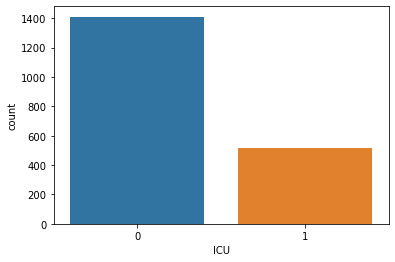

In [260]:
sns.countplot(data=data, x='ICU')

In [261]:
data['ICU'].mean()

0.2675324675324675

<AxesSubplot:xlabel='WINDOW', ylabel='count'>

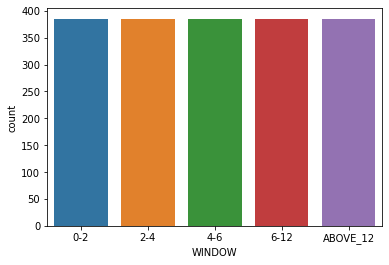

In [262]:
sns.countplot(data=data, x=data['WINDOW'])

<AxesSubplot:xlabel='WINDOW', ylabel='count'>

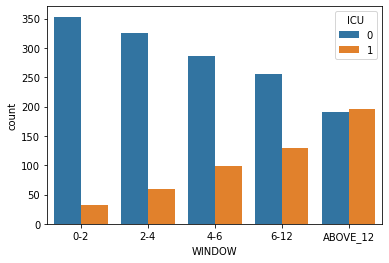

In [263]:
sns.countplot(x="WINDOW", hue="ICU", data=data)

<AxesSubplot:xlabel='AGE_ABOVE65', ylabel='count'>

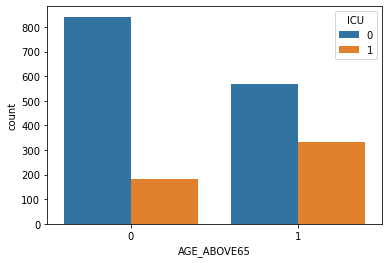

In [264]:
sns.countplot(x='AGE_ABOVE65', hue='ICU', data=data)

In [265]:
sorted(data.AGE_PERCENTIL.unique())

['10th',
 '20th',
 '30th',
 '40th',
 '50th',
 '60th',
 '70th',
 '80th',
 '90th',
 'Above 90th']

<AxesSubplot:xlabel='AGE_PERCENTIL', ylabel='count'>

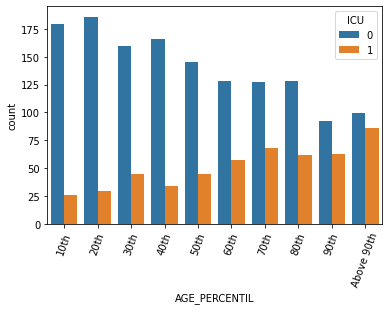

In [266]:
plt.xticks(rotation=70)
sns.countplot(x="AGE_PERCENTIL", hue="ICU", data=data, order=sorted(data.AGE_PERCENTIL.unique()))

<AxesSubplot:xlabel='IMMUNOCOMPROMISED', ylabel='count'>

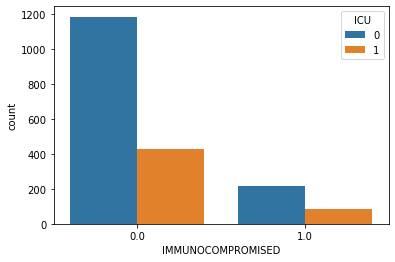

In [267]:
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=data)

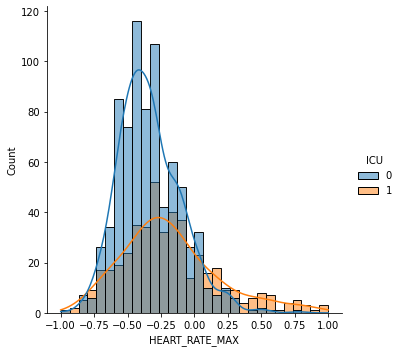

In [268]:
sns.displot(x='HEART_RATE_MAX', hue='ICU', data=data, kde=True)

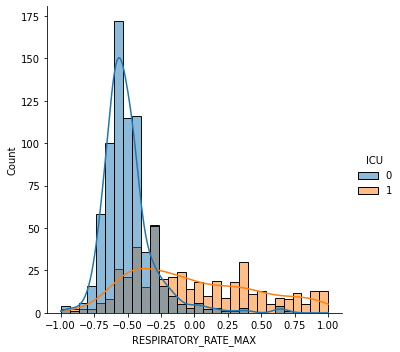

In [269]:
sns.displot(x='RESPIRATORY_RATE_MAX', hue='ICU', data=data, kde=True)

<AxesSubplot:xlabel='HEART_RATE_MAX', ylabel='RESPIRATORY_RATE_MAX'>

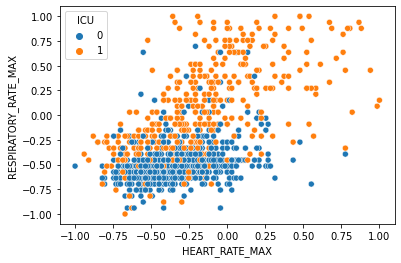

In [270]:
sns.scatterplot(x='HEART_RATE_MAX', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data)

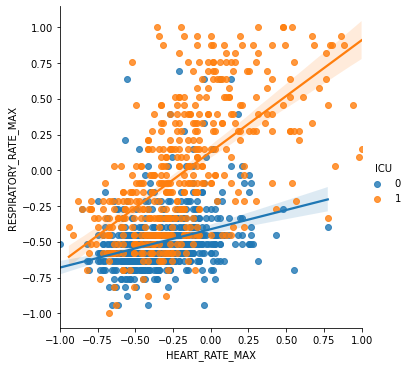

In [271]:
sns.lmplot(x='HEART_RATE_MAX', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data);

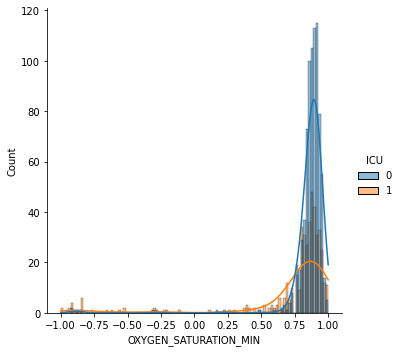

In [272]:
sns.displot(data=data, x="OXYGEN_SATURATION_MIN", hue='ICU', kde=True)

<AxesSubplot:xlabel='OXYGEN_SATURATION_MIN', ylabel='RESPIRATORY_RATE_MAX'>

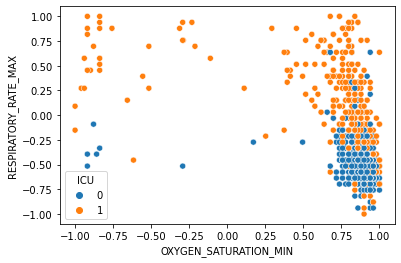

In [273]:
sns.scatterplot(x='OXYGEN_SATURATION_MIN', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data)

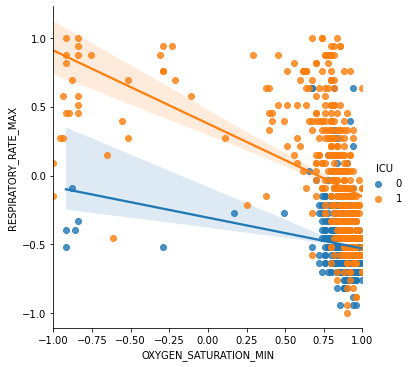

In [274]:
sns.lmplot(x='OXYGEN_SATURATION_MIN', y='RESPIRATORY_RATE_MAX', hue='ICU', data=data);

# Data preparation:

Data cleaning and preparation tasks. First we apply one hot encoding to string columns

In [275]:
data.dtypes[data.dtypes == object]

AGE_PERCENTIL    object
WINDOW           object
dtype: object

In [276]:
prepared_data = pd.get_dummies(data, columns=["AGE_PERCENTIL", "WINDOW"], prefix=["AGE_PERCENTIL", "WINDOW"])

In [277]:
prepared_data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1922,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1923,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


Next we are going to create an aux column in order to set the target atribute value to each patient's rows.

In [278]:
prepared_data['AUX_ICU'] = prepared_data['ICU']

In [279]:
group_prepared_data= prepared_data.groupby(by=prepared_data['PATIENT_VISIT_IDENTIFIER'])

In [280]:
group_prepared_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1922,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1923,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [281]:
group_prepared_data.get_group(0)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1


We set the final ICU value to all patient's previous rows, on this way we will be able to kwow whether a patient get in ICU or not on each row, so this will be the target attribute when building models. Then we fill missing values with the last known value as the dataset creator recomend.

In [282]:
final_data = pd.DataFrame()
for patient, frame in group_prepared_data:
    #print(frame)
    print('##################Patient {0}############################'.format(patient))
    print('##################ICU Previous values############################')
    print(frame['ICU'])
    print(frame.iloc[-1]['AUX_ICU'])
    frame['ICU'] =frame.iloc[-1]['AUX_ICU']
    print('##################ICU After values############################')
    print(frame['ICU'])
    print(frame.iloc[-1]['AUX_ICU'])
    #As recommended we fill na values with the last registered value for each pacient
    frame.bfill(inplace=True)
    print('##################next iteration############################\n')
    
    final_data = final_data.append(frame)
    

    
    

##################Patient 0############################
##################ICU Previous values############################
0    0
1    0
2    0
3    0
4    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 1############################
##################ICU Previous values############################
5    1
6    1
7    1
8    1
9    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 2############################
##################ICU Previous values############################
10    0
11    0
12    0
13    0
14    1
Name: ICU, dtype: int64
1.0
##################ICU After values######

Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 44############################
##################ICU Previous values############################
220    0
221    0
222    1
223    1
224    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
220    1.0
221    1.0
222    1.0
223    1.0
224    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 45############################
##################ICU Previous values############################
225    0
226    0
227    0
228    0
229    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
225    0.0
226    0.0
227    0.0
228    0.0
229    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 46############################
##################ICU Previous values##

##################Patient 87############################
##################ICU Previous values############################
435    0
436    1
437    1
438    1
439    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
435    1.0
436    1.0
437    1.0
438    1.0
439    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 88############################
##################ICU Previous values############################
440    0
441    0
442    0
443    1
444    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
440    1.0
441    1.0
442    1.0
443    1.0
444    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 89############################
##################ICU Previous values############################
445    0
446    0
447    0
448    1
449    1
Name: ICU, dtype: in

0.0
##################ICU After values############################
645    0.0
646    0.0
647    0.0
648    0.0
649    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 130############################
##################ICU Previous values############################
650    0
651    0
652    0
653    0
654    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
650    0.0
651    0.0
652    0.0
653    0.0
654    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 131############################
##################ICU Previous values############################
655    0
656    0
657    0
658    0
659    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
655    0.0
656    0.0
657    0.0
658    0.0
659    0.0
Name: ICU, dtype: float64
0.0
##################next iteration##

##################Patient 172############################
##################ICU Previous values############################
860    0
861    0
862    0
863    0
864    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
860    0.0
861    0.0
862    0.0
863    0.0
864    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 173############################
##################ICU Previous values############################
865    0
866    0
867    0
868    0
869    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
865    0.0
866    0.0
867    0.0
868    0.0
869    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 174############################
##################ICU Previous values############################
870    0
871    0
872    0
873    1
874    1
Name: ICU, dtype:

Name: ICU, dtype: int64
1.0
##################ICU After values############################
1060    1.0
1061    1.0
1062    1.0
1063    1.0
1064    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 213############################
##################ICU Previous values############################
1065    0
1066    0
1067    0
1068    0
1069    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
1065    1.0
1066    1.0
1067    1.0
1068    1.0
1069    1.0
Name: ICU, dtype: float64
1.0
##################next iteration############################

##################Patient 214############################
##################ICU Previous values############################
1070    0
1071    0
1072    0
1073    0
1074    1
Name: ICU, dtype: int64
1.0
##################ICU After values############################
1070    1.0
1071    1.0
1072    1.0
1073    1.0
1074    1.0
Name: ICU, dtyp

##################Patient 253############################
##################ICU Previous values############################
1265    0
1266    0
1267    0
1268    0
1269    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1265    0.0
1266    0.0
1267    0.0
1268    0.0
1269    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 254############################
##################ICU Previous values############################
1270    0
1271    0
1272    0
1273    0
1274    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1270    0.0
1271    0.0
1272    0.0
1273    0.0
1274    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 255############################
##################ICU Previous values############################
1275    0
1276    1
1277    1
1278    1
12

##################next iteration############################

##################Patient 293############################
##################ICU Previous values############################
1465    0
1466    0
1467    0
1468    0
1469    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 294############################
##################ICU Previous values############################
1470    0
1471    0
1472    0
1473    0
1474    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1470    0.0
1471    0.0
1472    0.0
1473    0.0
1474    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 295############################
##################ICU Previous values#########

##################Patient 333############################
##################ICU Previous values############################
1665    0
1666    0
1667    0
1668    0
1669    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1665    0.0
1666    0.0
1667    0.0
1668    0.0
1669    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 334############################
##################ICU Previous values############################
1670    0
1671    0
1672    0
1673    0
1674    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1670    0.0
1671    0.0
1672    0.0
1673    0.0
1674    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 335############################
##################ICU Previous values############################
1675    0
1676    0
1677    0
1678    0
16

##################next iteration############################

##################Patient 370############################
##################ICU Previous values############################
1850    0
1851    0
1852    0
1853    0
1854    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1850    0.0
1851    0.0
1852    0.0
1853    0.0
1854    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 371############################
##################ICU Previous values############################
1855    0
1856    0
1857    0
1858    0
1859    0
Name: ICU, dtype: int64
0.0
##################ICU After values############################
1855    0.0
1856    0.0
1857    0.0
1858    0.0
1859    0.0
Name: ICU, dtype: float64
0.0
##################next iteration############################

##################Patient 372############################
##################ICU Previous values#########

In [283]:
final_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,1


In [284]:
final_data.to_excel('./../data/intermediate/intermediate_ICU_Prediction.xlsx', index=False)

Checking null values after data treating

In [285]:
final_data.isnull().any(axis=1).sum()

39

In [286]:
(final_data.isnull().sum().sum()/np.product(data.shape)) * 100

1.6292798110979931

In [287]:
final_data[final_data.isnull().any(axis=1)]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU
212,42,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
213,42,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
214,42,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
371,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
372,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
373,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
374,74,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
939,187,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,1,0
995,199,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
996,199,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


Only 39 rows with missing data, what means around 1% of rows, so we decice to remove them.

In [288]:
final_data = final_data.dropna()

In [289]:
final_data.isnull().any(axis=1).sum()

0

Now, we remove the measures taken when the pacient were on ICU service because it hasn't sense to use them for building a predictive model for UCI admission.

In [290]:
final_data = final_data[final_data['AUX_ICU']!=1]

In [291]:
final_data[final_data['AUX_ICU']==1]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AUX_ICU


Lastly we remove non meaning col such as patient ID or the aux ICU col

In [292]:
final_data.drop(['PATIENT_VISIT_IDENTIFIER', 'AUX_ICU'], axis=1, inplace=True)

In [293]:
final_data.tail(1)

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
1924,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='ICU', ylabel='count'>

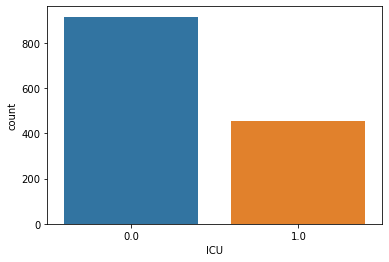

In [294]:
sns.countplot(data=final_data, x='ICU')

In [296]:
final_data['ICU'].mean()

0.3323615160349854

So, we obtain a 33% of ICU rows instead of 23% of the raw data.

In [ ]:
final_data.to_excel('./../data/prepared/prepared_ICU_Prediction.xlsx',index=False)